In [1]:
from keras import layers
from keras import models

Using TensorFlow backend.


## Building Model

In [2]:
model = models.Sequential()

In [3]:
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
from keras import optimizers

In [5]:
# 모델 마지막 레이어의 활성함수가 sigmoid이기 때문에 
# loss 함수를 binary crossentropy로 설정
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Data Preprocessing

In [6]:
# Data Preprocessing
from keras.preprocessing.image import ImageDataGenerator

In [7]:
import os
dataset_dir = "../keras_dataset/dogs_cats_small"

print(os.listdir(train_dir))

NameError: name 'train_dir' is not defined

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

dataset_dir = "../keras_dataset/dogs_cats_small/"
train_dir = dataset_dir + "train"
valid_dir = dataset_dir + "validation"

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150),
                                                    batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(valid_dir, target_size=(150,150),
                                                    batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
# for data_batch, labels_batch in train_generator:
#     print(data_batch.shape)
#     print(labels_batch.shape)
#     break
#  => error = Could not import PIL.Image. The use of `array_to_img` requires PIL.
#  => solution? = conda install pillow 


In [10]:
history = model.fit_generator(train_generator, steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 12s 123ms/step - loss: 0.6882 - acc: 0.5365 - val_loss: 0.6766 - val_acc: 0.5610
Epoch 2/30
100/100 [==============================] - 8s 75ms/step - loss: 0.6598 - acc: 0.5980 - val_loss: 0.6403 - val_acc: 0.6400
Epoch 3/30
100/100 [==============================] - 9s 86ms/step - loss: 0.6231 - acc: 0.6530 - val_loss: 0.6075 - val_acc: 0.6650
Epoch 4/30
100/100 [==============================] - 8s 85ms/step - loss: 0.5863 - acc: 0.6835 - val_loss: 0.6598 - val_acc: 0.6320
Epoch 5/30
100/100 [==============================] - 9s 89ms/step - loss: 0.5462 - acc: 0.7220 - val_loss: 0.5973 - val_acc: 0.6580
Epoch 6/30
100/100 [==============================] - 7s 71ms/step - loss: 0.5227 - acc: 0.7345 - val_loss: 0.5734 - val_acc: 0.6930
Epoch 7/30
100/100 [==============================] - 8s 75ms/step - loss: 0.4958 - acc: 0.7640 - val_loss: 0.5546 - val_acc: 0.7110
Epoch 8/30
100/100 [==============================] - 7s 71ms/step 

In [ ]:
model.save("cats_and_dogs_small_1.h5")

## Drawing 

In [11]:
import matplotlib.pyplot as plt

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

<Figure size 432x288 with 0 Axes>

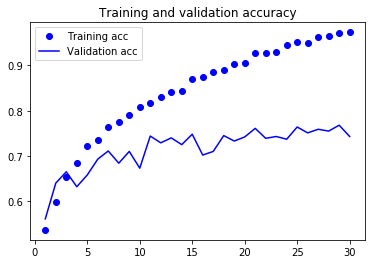

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

<Figure size 432x288 with 0 Axes>

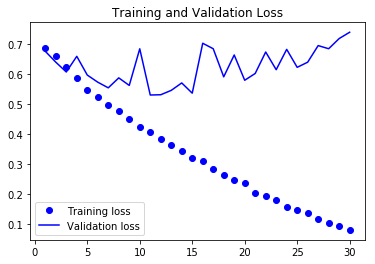

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.figure()